# Машинное обучение. Введение
При рассмотрении ИИ, было установлено два основополагающих подхода (нисходящий и восходящий), на их стыке находится машинное обучение, которое работает непосредственно с данными, и устанавливает между ними взаимосвязи.

Машинное обучение извлекает знания из данных. МО может работать не только с нейронными сетями, но и с более простыми алгоритмами.

Ссылки: [Весь код из примеров ниже](https://github.com/shwars/ai_course/blob/main/02-MLExpress/ExpressML.ipynb)

## Машинное обучение и Программирование

МО часто сравнивают с классическим программированием, поскольку процесс написания и построения программы чем-то похожи, только на выходе в случае программирования мы получаем какой-то абстрактный результат, а в случае МО, мы получаем программу.

![Сравнение МО и программирования](https://i.imgur.com/ZEksKMx.png)


## Машинное обучение.
На картинке ниже представлены компоненты, из которых строится программа МО.

![Процесс создания программы МО](https://i.imgur.com/hFeUOBD.png)

Полученная программа - модель проверяется на качество обучения. Для этого используется тестовый датасет (важно, чтобы он не был включён в обучающий датасет).

![Проверка модели](https://i.imgur.com/Jl8iwDV.png)

## Машинное обучение. Инструменты статистики.

Перед написанием модели, зачастую приходится проанализировать датасет, для этого можно использовать различные инструменты, от Python, до Excel.

Например, в Excel для этого очень удобно использовать сводные таблицы, в Python - numpy, pandas.

## Машинное обучение. Задачи

Обучение с учителем. Существует обучающая выборка, в которой есть набор параметров и ответ на интересующий нас запрос.
Примеры:
- Регрессия (нахождение значения на основе параметров)
- Классификация (определение класса объекта по параметрам)


Обучение без учителя. Обучающей выборки не существует, есть лишь представление об обработке тех или иных параметров, после чего модель при поступлении данных начнётся постепенно обучаться на них, создавая и совершенствуя правила обработки.

Примеры: 
- Кластеризация (группировка похожих объектов по определённым параметрам)
- Обучение с подкреплением (обучение на самом себе, отбрасывая неудачные попытки). Пример - обучение игре в шахматы.

![Задачи МО](https://i.imgur.com/0HyDL74.png)

## Машинное обучение. Пример предсказания стоимости билета на поезд.

Рассмотрим пример машинного обучения задачи регрессии. Посмотрим, что используется в нашей обучающей выборке.

X - признаки, от которых зависит искомое значение (параметры). В нашем случае расстояние, класс билета, время в пути.
Y - искомое значение - то, что мы непосредственно хотим научиться прогнозировать. В нашем случае это стоимость билета.

Признаки бывают числовыми и категориальными (те, что выражены словами).

![Описание обучающей выборки](https://i.imgur.com/ehkoV9Q.png)

Для числового признака (расстояния) можно построить график зависимости цены от расстояния. После чего провести апроксимирующую прямую (которая усредняет значения набора точек). После чего, для прогноза цены билета с любым расстоянием, можно провести линию к этой прямой и оттуда к оси цены и получить прогноз.

![График одного числового признака](https://i.imgur.com/ulAAqVj.png)

## Машинное обучение. Математика регрессии. Простейший случай

Наша модель имеет линейную формулу (aX + b).
Ошибка - расстояние (разница) между фактическим значением искомого параметра и значением, полученным с помощью апроксимации. Ошибка L(a, b) - сумма всех расстояний.

Задача - подбор параметров a, b таких, что ошибка будет минимальной

![Пример регрессии и ошибки на графике](https://i.imgur.com/3mCK56b.png)

## Метод наименьших квадратов.

Для вычисления ошибки зачастую используется метод наименьших квадратов, где высчитываются все квадраты отклонений, после чего берётся 0 производной и вычисляются параметры a, b.

![Метод наименьших квадратов 1](https://i.imgur.com/KXjPyMU.png)

Вычисление параметров имеет следующие формулы для одномерного и многомерного случаев:

![Метод наименьших квадратов 2](https://i.imgur.com/s2n8E9E.png)

## Машинное обучение. Практика на Python. Предсказание стоимости билета на поезд.

Будем использовать датасет с информацией о билетах в Европе. В датасете присутствует расстояние между городами, точки отправки и назначения, тип вагона, тип билета, время в пути, кол-во пассажиров и т.д. На его примере разберём, как строится модель для машинного обучения и прогнозирования цены билета от нескольких факторов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

import sklearn.preprocessing
import sklearn.pipeline
import sklearn.linear_model
import sklearn.compose
import sklearn.tree


In [2]:
df = pd.read_csv("./data/renfe-rail-sample.zip", compression='zip')

Разобьём датасет на обучающую и тестовую выборку. `train_size` отвечает за процент данных для обучающей выборки от всего датасета.

In [3]:
df_train, df_test = sk.model_selection.train_test_split(df, train_size=0.8)

Начнём прогнозирование одного параметра (расстояния). Изобразим график:

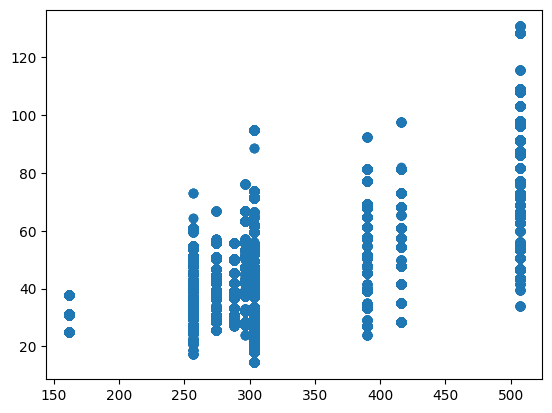

In [4]:
X = df_train["geodistance"]
Y = df_train["price"]

plt.scatter(X, Y)
plt.show()

Для нахождения коэффицентов `a`, `b` используем метод наименьших квадратов (см. выше).

In [5]:
n = len(X)
a = (X.sum()*Y.sum()-n*(X*Y).sum())/(X.sum()*X.sum()-n*(X*X).sum())
b = (Y.sum()*(X*X).sum()-X.sum()*(X*Y).sum())/(X*X).sum()/(n-X.sum())
print(f"a={a}, b={b}")

a=0.1512238727079869, b=-0.0006874199309329898


Построение апроксимирующей прямой для одного называется линейной регрессией. Для большего кол-ва параметров, используются многомерные апроксимирующие плоскости (их вычисление так же было приведено выше).

Построим её на предыдущем графике:

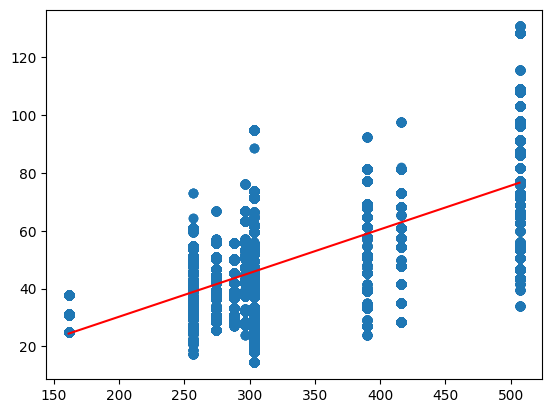

In [6]:
plt.scatter(X,Y)
lX = [X.min(),X.max()]
lY = [a*x+b for x in lX]
plt.plot(lX,lY,c='red')
plt.show()

## Подсчёт ошибки.

Будем высчитывать ошибку на тестовой выборке. Для этого существуют следующие алгоритмы:
- Среднеквадратичное отклонение (MSE)
- Средняя (абсолютная) ошибка (MAE)
- Относительная средняя ошибка. Показатель ошибки в процентах относительно среднего значения целевой величины.

![Ошибки на тестовой выборке](https://i.imgur.com/EzeEKJm.png)

In [7]:
X_t, Y_t = df_test["geodistance"], df_test["price"]

def MSE(x,y):
    return np.mean(np.square(x-y)) 

def MAE(x,y):
    return np.mean(np.abs(x-y))

print(f"MSE={np.sqrt(MSE(a*X_t+b,Y_t))}, MAE={MAE(a*X_t+b,Y_t)}, MAE(%)={MAE(a*X_t+b,Y_t)/Y_t.mean()}")

MSE=16.320856448215892, MAE=13.62772010679725, MAE(%)=0.2857375900575813


## Оптимизация обучения модели. Метод градиентного спуска

Среднее квадратичное отлично работает для малых и средних размерностей. Но если размерность большая или функция ошибки является сложной, то прибегают к оптмизационным численным способам нахождения параметров `a`, `b`.

Численный метод зависит от обучающего датасета и некого параметра Тэта. После чего вычисляем предсказание, зависящее от параметров и Тэта, вычисляем ошибку и подбираем Тэта так, чтобы минимизировать ошибку.

По сути, это численная задача нахождения экстремума функции ошибки (минимума), у этой задачи есть множество алгоритмов решений, рассмотрим метод градиентного спуска.

![Минимизация ошибки](https://i.imgur.com/siDIhNj.png)

![Метод градиентного спуска](https://i.imgur.com/zZIztIr.png)

P.S. Значение шага Тета необходимо подбирать опытным путём, пока ошибка не станет уменьшаться.

In [8]:
a,b = np.random.normal(size=2)
eta = 0.000005
for i in range(10):
    print(f"Epoch {i}: MSE={MSE(a*X+b,Y)}")
    # print(f"a={a},b={b}")
    a,b = a-eta*((a*X+b-Y)*X).mean(), b-eta*(a*X+b-Y).mean()

Epoch 0: MSE=187404.80239832093
Epoch 1: MSE=46099.65196143419
Epoch 2: MSE=11489.471911669887
Epoch 3: MSE=3012.3246923912534
Epoch 4: MSE=935.9984531582897
Epoch 5: MSE=427.4393186602263
Epoch 6: MSE=302.8768155866731
Epoch 7: MSE=272.3674486581748
Epoch 8: MSE=264.89472240515437
Epoch 9: MSE=263.06441101847764


Выведем прямую из коэффицентов, полученных методом градиентного спуска.

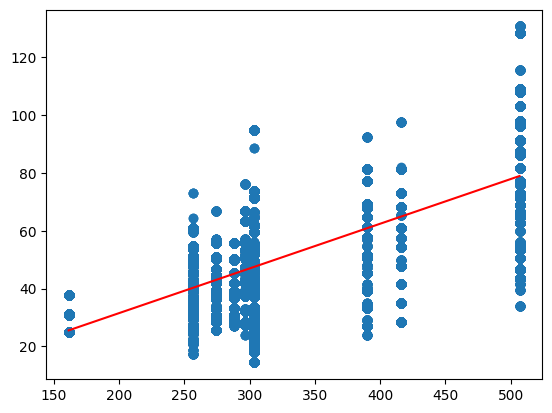

In [9]:
plt.scatter(X,Y)
lX = [X.min(),X.max()]
lY = [a*x+b for x in lX]
plt.plot(lX,lY,c='red')
plt.show()

Добавим ещё численных параметров.

Используем векторное уможение, в качестве коэффицента a используется массив коэффицентов.

In [10]:
X = df_train[["geodistance","duration","departure_hour"]]
X_t = df_test[["geodistance","duration","departure_hour"]]

*a, b = np.random.normal(size=4)
a = np.array(a)
eta = 0.000005
for i in range(10):
    print(f"Epoch {i}: MSE={MSE(X@a+b,Y)}")
    # print(f"a={a},b={b}")
    a,b = a-eta*((X@a+b-Y)*X.T).mean(axis=1), b-eta*(X@a+b-Y).mean()

Epoch 0: MSE=229513.54527626125
Epoch 1: MSE=56245.33780661959
Epoch 2: MSE=13946.984448761306
Epoch 3: MSE=3621.0794177845955
Epoch 4: MSE=1100.3098435343923
Epoch 5: MSE=484.9351546970442
Epoch 6: MSE=334.7067396118806
Epoch 7: MSE=298.0301445366772
Epoch 8: MSE=289.0738964175645
Epoch 9: MSE=286.8847586825011


In [11]:
a, b

(geodistance       0.123440
 duration          1.077121
 departure_hour    0.699208
 dtype: float64,
 -1.174907161881036)

Средняя абсолютная ошибка:

In [12]:
np.mean(np.abs(X_t@a + b - Y_t))

13.967488155480922

## Машинное обучение. Признаки.

Рассмотрим, какие признаки бывают:

Числовые:
- Непрерывные (возраст, рост). С таким типом мы только что работали.
- Дискретные (количество детей)

Категориальные:
- Порядковые (оценка). Такой признак можно интерпретировать, как числовой, совершив подмену признака на цифру по возрастанию.
- Номинальные (цвет, класс)

Преобразование признаков к числовым:
![Преоборазование признаков к числовым](https://i.imgur.com/6Wy7T0H.png)

One-Hot Encoding - запись признака вектором значений, в котором один из элементов единица, а все остальные - нули. 4
Например, имеем красный цвет, всего дано 6 цветов, получим вектор, из 5 нулей и единичкой в индексе, который отвечает за красный цвет.

P.s. Пример с цветов является показательным, но не совсем верным, для цвета чаще всего используется приведение к RGB формату.


Бывают задачи, когда необходимо перейти от числовых признаков к категориальным. В таком случае непрерывные величины подвергаются дискретизации - определённые интервалы значений формируют группы (категории), их число должно быть конечно. Например, для возраста будут использоваться возрастные категории (молодой, старый и т.д.) 

## Категориальные признаки. Практический пример.

Изучим типы билетов:

In [13]:
df["fare"].value_counts()

fare
Promo +       566980
Flexible      422474
Adulto ida    257222
Name: count, dtype: int64

Отобразим среднюю цену по тарифу:

<Axes: xlabel='fare'>

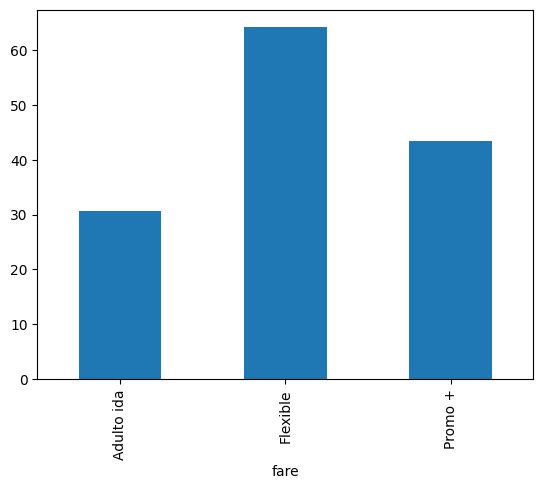

In [14]:
df.groupby("fare").mean(numeric_only=True)['price'].plot(kind='bar')

По информации из графика, можно сказать, что признак можно интерпретировать, как порядковый, так и номинальный, такой параметр можно представить с помощью:
- One-Hot Encoding.
- Label Encoding (приводит уникальные значения к соответсвующим численным значениям). Используется для порядковых.

P.S. (Другие варианты кодирования символьных признаков)[https://habr.com/ru/articles/666234/]

Используем One-Hot Encoding. В Pandas для этого существует специальная функция `get_dummies`.

In [15]:
pd.get_dummies(df['fare'])

,Adulto ida,Flexible,Promo +
0,False,True,False
1,False,False,True
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
1246671,False,False,True
1246672,False,True,False
1246673,False,True,False
1246674,False,True,False


Добавим в таблицу признаков кодирование тарифа с помощью One-Hot Encoding и проведём привычный нам поиск коэффицентов и ошибки:

In [16]:
X = pd.get_dummies(df_train,columns=["fare"])[['geodistance','fare_Adulto ida','fare_Promo +','fare_Flexible']]
X

,geodistance,fare_Adulto ida,fare_Promo +,fare_Flexible
749565,256.506445,False,True,False
1069029,256.506445,False,True,False
17422,256.506445,False,False,True
860974,296.103026,False,True,False
986823,303.180694,False,True,False
...,...,...,...,...
752373,161.318295,False,False,True
914421,256.506445,False,True,False
149673,303.180694,False,False,True
598837,415.639080,False,False,True


In [17]:
*a, b = np.random.normal(size=5)
a = np.array(a)
eta = 0.000005
for i in range(20):
    print(f"Epoch {i}: MSE={MSE(X@a+b,Y)}")
    # print(f"a={a},b={b}")
    a,b = a-eta*((X@a+b-Y)*X.T).mean(axis=1), b-eta*(X@a+b-Y).mean()

Epoch 0: MSE=32715.629251283426
Epoch 1: MSE=8218.36314657668
Epoch 2: MSE=2218.236695019673
Epoch 3: MSE=748.6227168605617
Epoch 4: MSE=388.6691324781903
Epoch 5: MSE=300.50515176490654
Epoch 6: MSE=278.9107170812611
Epoch 7: MSE=273.62119030796794
Epoch 8: MSE=272.32523173159626
Epoch 9: MSE=272.0074195591243
Epoch 10: MSE=271.9291852104888
Epoch 11: MSE=271.90963076494313
Epoch 12: MSE=271.9044488153588
Epoch 13: MSE=271.9027871282413
Epoch 14: MSE=271.9019876610862
Epoch 15: MSE=271.9013993808209
Epoch 16: MSE=271.90086282719165
Epoch 17: MSE=271.9003389447066
Epoch 18: MSE=271.8998181681127
Epoch 19: MSE=271.8992981520182


Изучив коэффицент `a`, можно узнать, как влияют на цену те или иные признаки. Из-за этого модель называется интерпретируемой.

In [18]:
a

geodistance        0.153595
fare_Adulto ida     0.68204
fare_Promo +       0.938113
fare_Flexible      0.009875
dtype: object

## Машинное обучение. Scikit learn.

Библиотека SciKit learn является стандартом для работы в машинном обучении, в ней реализовано огромное количество алгоритмов, необходимых для работы с данными, а так же для обучения моделей. Выше был разобран метод градиентного спуска, однако на практике никто не реализует его с нуля или другие классические алгоритмы математики, для этого и создан данный пакет.

Рассмотрим, как работает SciKit Learn:

Для начала выделим численные и категориальные признаки:

In [19]:
numeric = ['geodistance', 'duration', 'departure_hour']
categorial = ['vehicle_type', 'vehicle_class', 'fare']

Обучим модель на численных признаках:

In [20]:
X = df_train[numeric]

model = sk.linear_model.LinearRegression()
model = model.fit(X, Y)

Самый важный метод, который отвечает за обучение - `fit`. Он подбирает наиболее оптимальные коэффиценты, дабы минимизировать ошибку - всё то, что мы делали ручками выше.

В SciKit Learn также реализованы различные методы вычисления ошибок, для примера вычислим точность на тестовой выборке:

In [21]:
X_t = df_test[numeric]
Y_t_pred = model.predict(X_t)

print(f"MSE={sk.metrics.mean_squared_error(Y_t, Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=223.96890112685375, MAE=11.95161180446463, MAE(%)=0.2888176033307507


Ошибки в пакете SciKil Learn:
- mean_squared_error - средняя квадратичная ошибка
- mean_absolute_error - средняя абсолютная ошибка
- mean_absolute_percentage_error - абсолютная процентная ошибка

Коэффиценты, вычисленные моделью:
- coef_ - a
- intercept_ - b

In [22]:
print(f"Coefficients={model.coef_} intercept={model.intercept_}")

Coefficients=[ 0.17550894 -3.96601391  0.19937921] intercept=2.080615676747705


Для кодирования признаков можно использовать объекты пакета SciKit Learn, они называются `*Encoder`. 
Для определения значений признаков используется `fit`. 
Для вывода информации о полученных значениях используется `categories_`.
Чтобы закодировать набор данных используется `transform`.

Пример использования энкодера:

In [23]:
ohe = sk.preprocessing.OneHotEncoder()
ohe.fit(df[['fare', 'vehicle_class']])
print(ohe.categories_)
ohe.transform(df[['fare', 'vehicle_class']]).toarray()[:10]

[array(['Adulto ida', 'Flexible', 'Promo +'], dtype=object), array(['Turista', 'Turista Plus', 'Turista con enlace'], dtype=object)]


array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.]])

Чтобы упростить работу с разными типами признаков, можно использовать механизм трансформеров:

In [24]:
transformer = sk.compose.make_column_transformer(
    (sk.preprocessing.OneHotEncoder(), ['fare']), 
    (sk.preprocessing.OneHotEncoder(), ['vehicle_type']),
    (sk.preprocessing.OneHotEncoder(), ['vehicle_class']),
    remainder='passthrough'
)

X = transformer.fit_transform(df_train[numeric + categorial])

X.toarray()[:2]

array([[  0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          0.        , 256.50644533,   1.67      ,  14.        ],
       [  0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          0.        , 256.50644533,   1.75      ,  21.        ]])

Таким образом были получены обработанные входные данные, котрые можно использовать для обучения модели:

In [25]:
model = sk.linear_model.LinearRegression()
model.fit(X,Y)
X_t = transformer.transform(df_test[numeric + categorial])
Y_t_pred = model.predict(X_t)

print(f"MSE={sk.metrics.mean_squared_error(Y_t, Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=74.96617134959763, MAE=6.023519225613029, MAE(%)=0.14007150057668266


Теперь, когда для обучения использовались все возможные признаки, точность предсказания кратно увеличилась. Однако остаётся ещё один способ увеличить точность прогнозирования - нормализация данных обучающей выборки.

## Нормализация значений.

Нормализация значений - масштабирование значений всех признаков к единому интервалу, поскольку OneHot Encoding использует интервал от 0 до 1, то имеет смысл подогнать все значения к этому интервалу.

Так же часто используются интервалы [-1; 1] или нормальное распределение с центром в 0.

В Sklearn для этого существуют два вида нормализации (используются внутри трансформера):
- `MinMaxScaler` - преобразует значения к диапазону 0-1 линейным способом
- `MaxAbsScaler` - масштабирует максимальное абсолютное значение до размера единицы
- `StandartScaler` - вычитает среднее и делит на дисперсию (нормально распределение)


Применим их на практике:

In [26]:
transformer = sk.compose.make_column_transformer(
    (sk.preprocessing.StandardScaler(), ['geodistance']),
    (sk.preprocessing.StandardScaler(), ['duration']),
    (sk.preprocessing.StandardScaler(), ['departure_hour']),
    (sk.preprocessing.OneHotEncoder(), ['fare']),
    (sk.preprocessing.OneHotEncoder(), ['vehicle_type']),
    (sk.preprocessing.OneHotEncoder(), ['vehicle_class'])
)
    
X = transformer.fit_transform(df_train[numeric + categorial])
X.toarray()[:2]


array([[-0.45692388, -0.52383261,  0.14027523,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [-0.45692388, -0.47403319,  1.69034869,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ]])

Обучим модель и проверим ошибку:

In [27]:
model = sk.linear_model.LinearRegression()
model = model.fit(X,Y)
X_t = transformer.transform(df_test[numeric+categorial])
Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=74.96612578310419, MAE=6.024452926919938, MAE(%)=0.14008986475902813


Результат изменений сильно зависит от входных данных, порой нормализация даёт значительный прирост точности прогнозирования. В данном случае измнений по сути нет.

## Добавление аргументов. Значимость признаков.

Не всегда признаки вносят в результат линейную зависимость, определённые признаки могут влиять на результат больше, чем другие признаки. Поэтому, порой приходится работать с разными зависимостями в жизни (логарифмические, экспоненциальные и т.д.)

Для этого необходимо модерзнизировать входные данные соответствующими преобразованиями над признаками. Часто добавление происходит вручную, когда есть полное понимание структуры данных и признаков. В тех случаях, когда нет чёткого понимания работы и зависимостей разных признаков и их влияния на результат, можно с помощью `PolynomialFeatures` добавить полиномиальные признаки степени 2 (квадраты + попарные перемножения), чтобы проверить, может ли подобное преобразование внести улучшения в точность прогнозирования.

In [28]:
polynomal = sk.preprocessing.PolynomialFeatures()

Xp = polynomal.fit_transform(X)

X.shape, Xp.shape

((997340, 24), (997340, 325))

Выше видно, что благодаря полиномиальному преобразованию из 24 исходных атрибутов, было получено 325, что кратно повышает, как время обучения модели, так и вероятность получения более точного прогноза.

Обучим модель на расширенном наборе признаков:

In [29]:
model.fit(Xp, Y)

Xp_t = polynomal.transform(X_t)
Yp_t_pred = model.predict(Xp_t)

print(f"MSE={sk.metrics.mean_squared_error(Y_t,Yp_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Yp_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Yp_t_pred)}")

MSE=49.89191776208314, MAE=4.6078332552229275, MAE(%)=0.10943063189914656


Из примера выше, видно, что точность увеличилась на несколько процентов. Однако, для получения этой точности, мы не только жертвуем временем, но и рискуем получить переобучение.

## Переобучение.

Суть переобучения в том, можно получить почти идеальную точность на обучающей выборке, однако, эта точность будет получена неверна, сама модель не будет апроксимировать нужные нам значения, она будет их подбирать точечно, при этом выдавай совсем другую функцию. Таким образом, на тестовой выборке, будет получена большая вероятность ошибки, которой не было на обучающей выборке.

Переобучение возникает из-за дисбаланса между кол-во примеров в обучающей выборке и количеством параметров (кол-во признаков должно быть сильно меньше, чем кол-во примеров).

Пример переобучения на линейной регрессии:

![Пример переобучения](https://i.imgur.com/oZucYKt.png)

В данном случае, 300 признаков кратно меньше 1КК результатов в обучающей выборке, поэтому проблем с переобучением не возникло.

Поэтому, лучше всего понимать зависимости между данными, дабы не создавать избыточное количество признаков.

## Пайплайны.

Обучение модели состоит из нескольких этапов, которые повторялись много раз - создание трансформера (преобразование, масштабирование данных), применение к признакам различных зависимостей. При чём, на каждом шаге приходилось обучать или адаптировать модели под определённые нужды. Все эти поэтапные шаги можно заменить одним, которые сразу обучит трансформер, масштабирует данные, обучит модель и т.д.

Все эти шаги можно поместить в один конвейер (пайплайн), который можно описать в `sklearn` с помощью `Pipeline`. На выходе получим тот же результат, но более читаемый и лаконичный код.

P.S. PipeLine может объединять в себе любые элементы, которые имеют единый интерфейс обучения (`fit`, `fit_transform`).

In [31]:
pipe = sk.pipeline.Pipeline([
    ('ColumnTransform', transformer),
    ('PolyFeatures', polynomal),
    ('LinearModel', model)
])

pipe.fit(df_train[numeric + categorial], Y)

pipe.score(df_test[numeric + categorial], Y_t)

0.8976618742952479

## Деревья решений.

Многие признаки могут вносить свой вклад в конечное значение вне зависимости от какой-либо функции, а скачкообразно. Например, цена билета в зависимости от тарифа, также актуальным примером является прогрессивный подход к налогооблажению (в зависимости от заработка меняется % налога).

Подобные зависимости фиксируются с помощью условий, для этого используются нелинейные модели - деревья решений. На практике, изменений почти нет, просто теперь для обучения используется `DecisionTreeRegressor`.

Попробуем обучить модель с помощью дерева решений на исходных данных (без оптимизаций).

In [32]:
model = sk.tree.DecisionTreeRegressor()
model = model.fit(X, Y)

Y_t_pred = model.predict(X_t)
print(f"MSE={sk.metrics.mean_squared_error(Y_t,Y_t_pred)}, \
MAE={sk.metrics.mean_absolute_error(Y_t,Y_t_pred)}, \
MAE(%)={sk.metrics.mean_absolute_percentage_error(Y_t,Y_t_pred)}")

MSE=33.08068125830104, MAE=2.8257860148633926, MAE(%)=0.07068580538213681


# 